In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Distribution of the Sample Average

(16.658155515370705, 39.480199851609314)

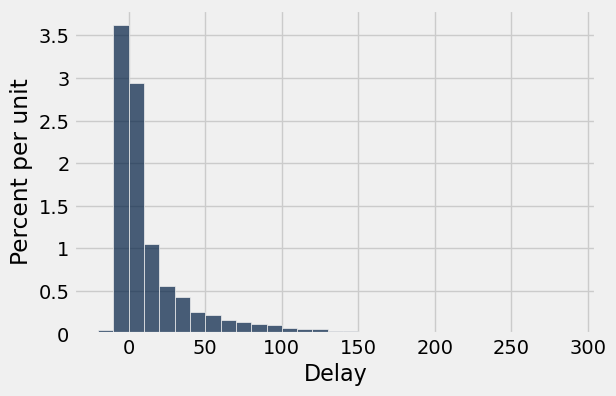

In [2]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)
delay_mean = np.average(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))
delay_mean,delay_sd

In [3]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [4]:
def ten_thousand_sample_means(sample_size):
    """Use the bootstrap to approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

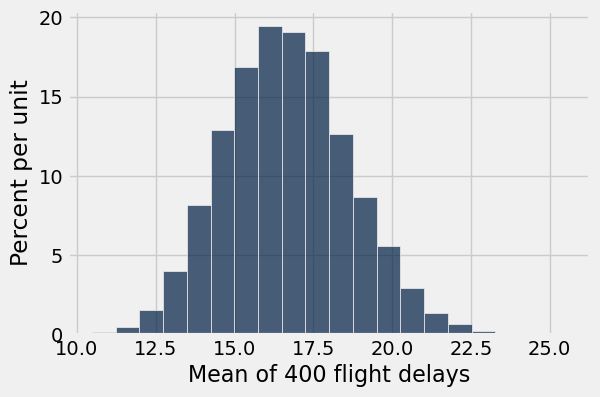

In [5]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)

In [6]:
united.num_rows

13825

In [7]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

## CLT: Center

Population Average: 16.6581555154


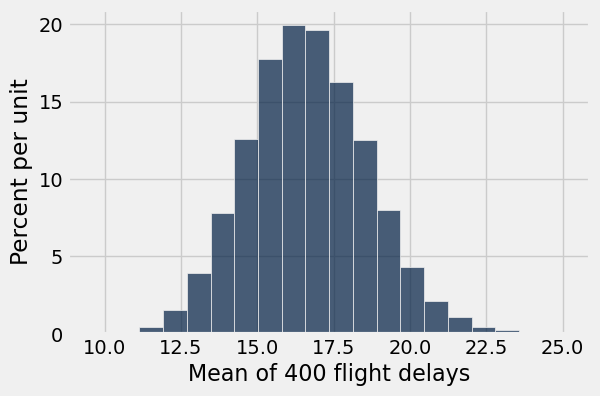

In [8]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

## CLT: Spread

In [9]:
sample_means_900 = ten_thousand_sample_means(900)

In [10]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

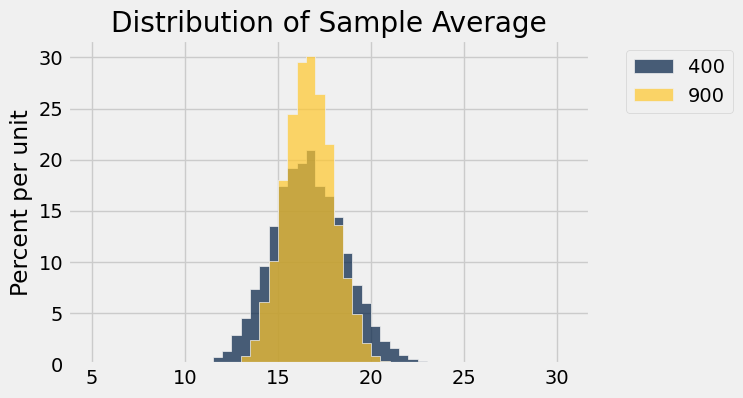

In [11]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

## Quantifying the Effect of Sample Size

In [12]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.698357

Population SD: 39.4801998516
SD of sample means: 4.01885722445
Ratio: 9.82373785547


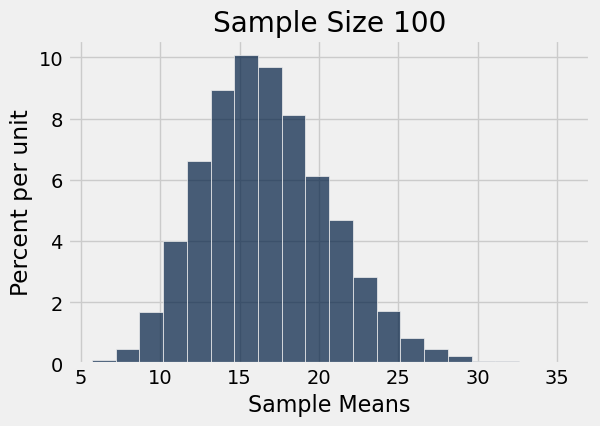

In [13]:
plot_and_summarize_sample_means(100)

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.6484295

Population SD: 39.4801998516
SD of sample means: 1.97014616299
Ratio: 20.0392237862


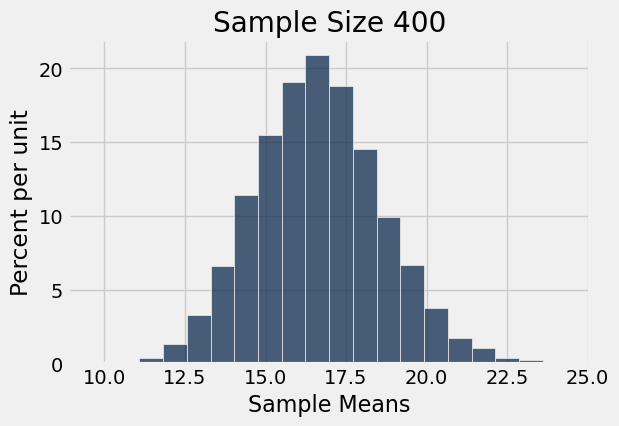

In [14]:
plot_and_summarize_sample_means(400)

Sample size:  900
Population mean: 16.6581555154
Average of sample means:  16.6165415556

Population SD: 39.4801998516
SD of sample means: 1.32430976931
Ratio: 29.8119071282


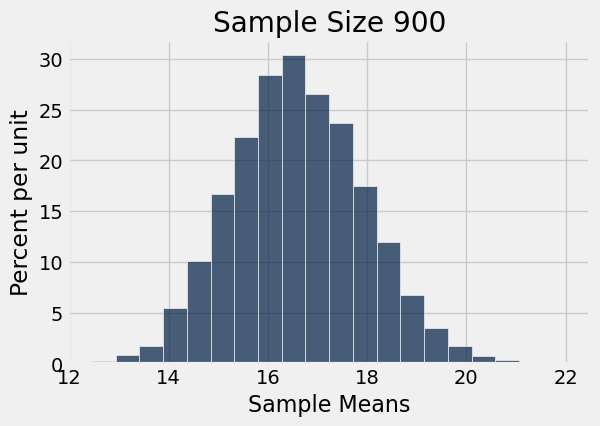

In [15]:
plot_and_summarize_sample_means(900)

In [16]:
39.48 / np.sqrt(100)

3.9479999999999995

In [17]:
39.48 / np.sqrt(400)

1.9739999999999998

In [18]:
39.48 / np.sqrt(900)

1.3159999999999998